# feature importance in each Funnel Step (using R)

In [8]:
#0: Import Libraries
library(rpart)
library(rpart.plot)
library(randomForest)
library(htmlTable)
library(Gmisc)

Loading required package: Rcpp


## Funnel step: Exposure

In [16]:
infilename = "Data/derived_data/funnel_step_exposure.csv"

In [20]:
## load dataframe from csv
fii <- read.csv(infilename)

summary(fii)

       X            country          age            gender      marital_status 
 Min.   :   0   kenya   :2994   Min.   :15.00   Min.   :1.000   Min.   :1.000  
 1st Qu.: 937   nigeria :6001   1st Qu.:24.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :1874   tanzania:3001   Median :30.00   Median :2.000   Median :3.000  
 Mean   :2099   uganda  :3000   Mean   :33.82   Mean   :1.526   Mean   :2.605  
 3rd Qu.:2811                   3rd Qu.:40.00   3rd Qu.:2.000   3rd Qu.:3.000  
 Max.   :6000                   Max.   :96.00   Max.   :2.000   Max.   :9.000  
                                NA's   :75                                     
 education_level  heard_of_mobile_money
 Min.   : 1.000   Min.   :1.000        
 1st Qu.: 3.000   1st Qu.:1.000        
 Median : 4.000   Median :1.000        
 Mean   : 4.402   Mean   :1.428        
 3rd Qu.: 5.000   3rd Qu.:2.000        
 Max.   :15.000   Max.   :2.000        
                                       

In [21]:
names(fii)

[1] "X"                     "country"               "age"                  
[4] "gender"                "marital_status"        "education_level"      
[7] "heard_of_mobile_money"

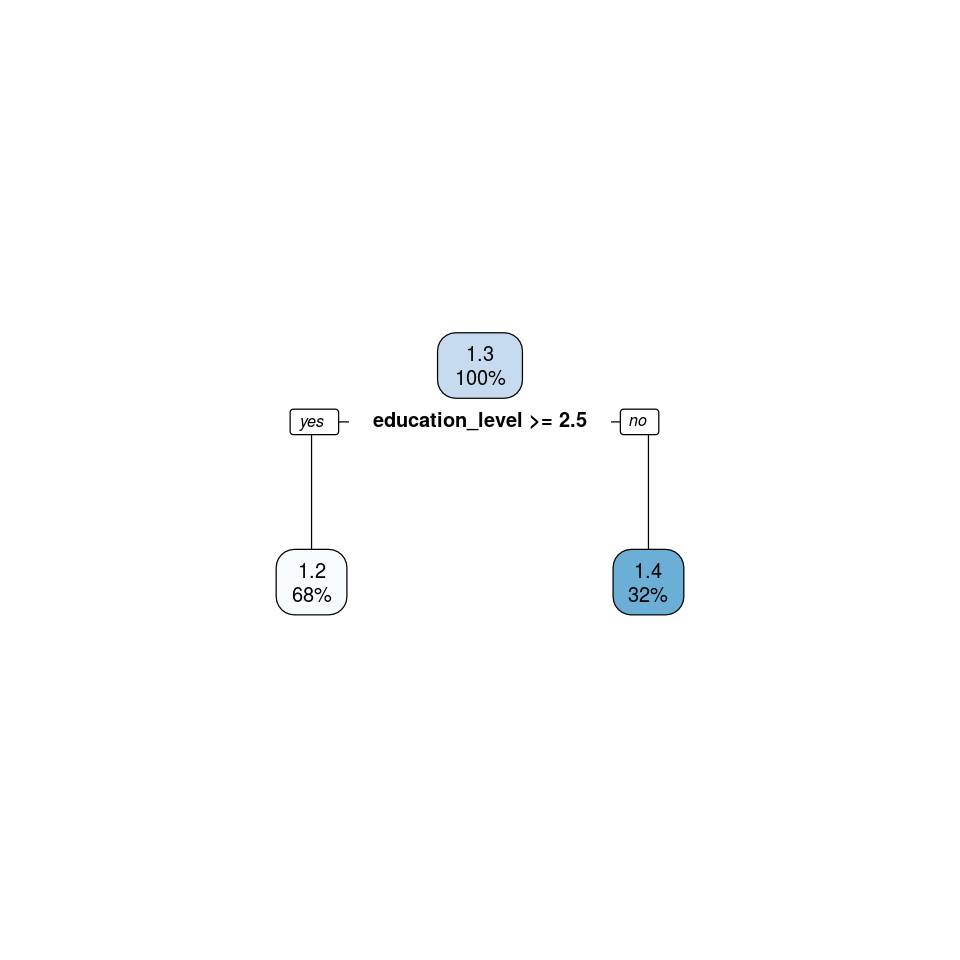

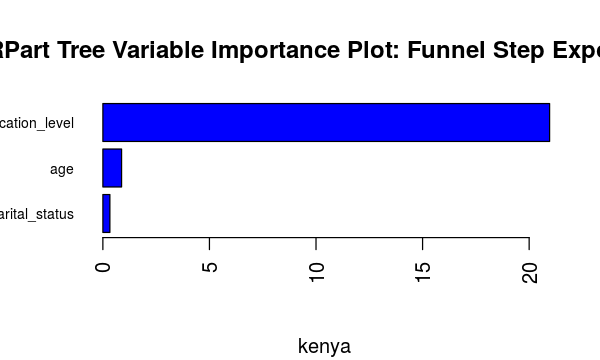

In [76]:
selected_country = 'kenya'

country_fii = fii[fii$country==selected_country,]

tree <- rpart(heard_of_mobile_money~., 
              data=country_fii[, 
                    c('age', 'gender', 'marital_status', 'education_level', 'heard_of_mobile_money')], 
              cp=0.01)

options(repr.plot.width=8, repr.plot.height=8)
rpart.plot(tree)

options(repr.plot.width=5, repr.plot.height=3)
barplot(
    sort(tree$variable.importance), 
    col=4, las=2, cex.names = .7, horiz=T, 
    main="RPart Tree Variable Importance Plot: Funnel Step Exposure", 
    sub=selected_country)



In [89]:
dat <- country_fii[
    complete.cases(country_fii[,c('age', 'gender', 'marital_status', 'education_level', 'heard_of_mobile_money')]),
    c('age', 'gender', 'marital_status', 'education_level', 'heard_of_mobile_money')]

In [92]:
col <- 'heard_of_mobile_money'

dat <- country_fii[
    complete.cases(country_fii[,c('age', 'gender', 'marital_status', 'education_level', 'heard_of_mobile_money')]),
    c('age', 'gender', 'marital_status', 'education_level', 'heard_of_mobile_money')]

forest <- randomForest(
    as.factor(col)~.,
    data=dat,
    cp=0.001)

# varImpPlot(
#     forest, 
#     main = "Random Forest Variable Importance Plot: Funnel Step Exposure", 
#     col=4, 
#     sub=selected_country)


ERROR: Error in model.frame.default(formula = as.factor(col) ~ ., data = dat, : variable lengths differ (found for 'age')
